In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [3]:
def plot_imagens(imagens, altura, largura, n_linhas, n_cols, amostra):
    '''Para a visualização das imagens'''
    plt.figure(figsize = (2.5 * n_cols, 2.5 * n_linhas))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_linhas * n_cols):
        plt.subplot(n_linhas, n_cols, i + 1)
        plt.imshow(imagens[amostra[i]].reshape((altura, largura)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

In [5]:
def preto_e_branco(rgb):
    '''Converte a imagem colorida para uma imagem em preto e branco'''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Quantidade total de imagens: 15747.


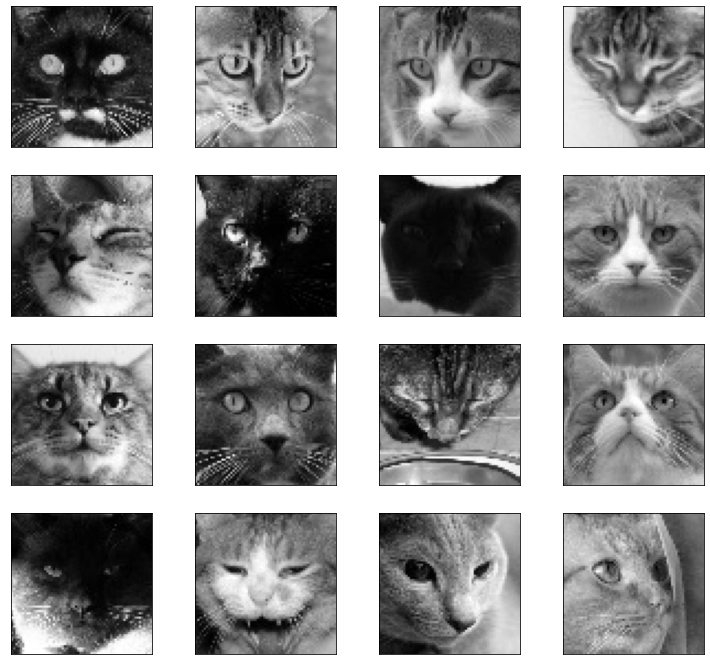

In [6]:
dir = os.getcwd() + '/imgs/cats' #diretório
nomes_imgs = os.listdir(dir)[:-1] #nomes das imagens

#lista dos paths para cada imagem:
path_imgs=[]
for nome in nomes_imgs:
    path_imgs.append(dir + '/' + nome)

imgs = np.array([plt.imread(img) for img in path_imgs]) #cria array das imgs

#Tranforma cada img colorida em preto e branco:
imgs_bw = []
for imagem in imgs:
    imgs_bw.append(preto_e_branco(imagem))
imgs_bw = np.array(imgs_bw)

#plota algumas imagens usando a função criada no começo:
num_imgs, altura, largura = imgs_bw.shape

amostra = random.sample(range(0, imgs_bw.shape[0]), 16) #amostra aleatória de imagens para plotar

plot_imagens(imgs_bw, altura, largura, n_linhas = 4, n_cols = 4, amostra=amostra)
print(f'Quantidade total de imagens: {imgs_bw.shape[0]}.')

In [7]:
# Transformando a array imgs_bw (de 3 dimensões) em uma matriz (array de 2 dim) em que cada imagem é uma linha
matriz_imgs = imgs_bw.reshape(imgs_bw.shape[0], imgs_bw.shape[1]*imgs_bw.shape[2])
matriz_imgs.shape # Para conferir se deu certo

(15747, 4096)

In [8]:
#Centralizando as imagens:
media = np.mean(matriz_imgs, axis = 0)
imgs_cent = matriz_imgs - media

([], [])

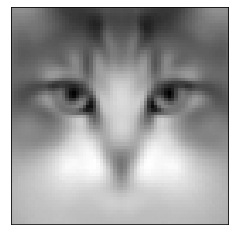

In [9]:
# Face média dos gatinhos
plt.imshow(media.reshape(64,64), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [10]:
# Matriz de covariância:
# Pelo que eu entendi, a matriz de covariância C corresponde a AA^T, então encontrar os autovetores de C
# é a mesma coisa que calcular o SVD de A, porque as colunas de U são as eigenfaces

In [11]:
# Calculando a SVD das imagens
U, S, VT = np.linalg.svd(imgs_cent)

In [12]:
# Transformando S em uma matriz diagonal com o mesmo tamanho que imgs_cent (já que estamos calculando a decomposição dela)
S0 = np.zeros(imgs_cent.shape)
S0[:S.shape[0], :S.shape[0]] = np.diag(S)
np.allclose(U.dot(S0.dot(VT)), imgs_cent) # Para confirmar se deu certo

True

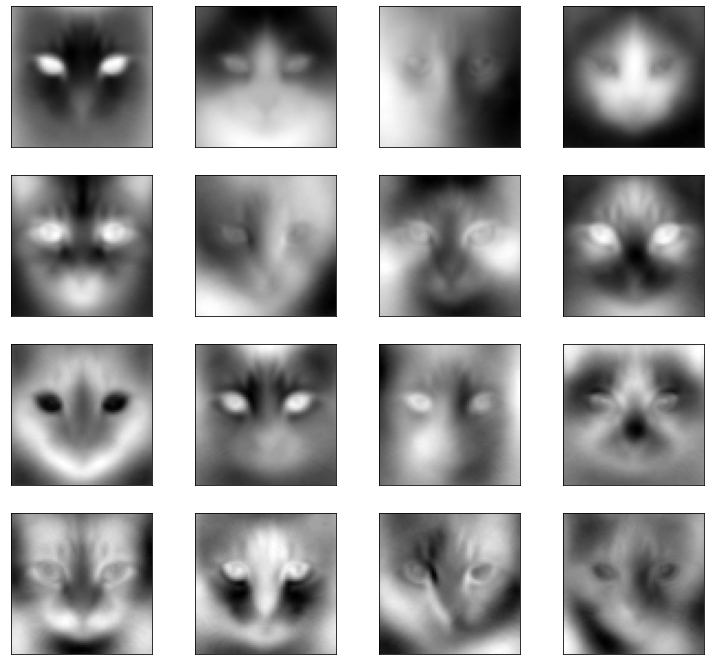

In [20]:
# Selecionando algumas eigenfaces e plotando o resultado
C = VT[:250]
#print(C.shape)
eigenfaces = C.reshape((250, 64, 64))
#print(eigenfaces.shape)
plot_imagens(eigenfaces, altura, largura, n_linhas = 4, n_cols = 4, amostra=range(0, C.shape[0])[:16])

# Referências:
- STRANG, Gilbert. **Introduction to Linear Algebra.** 5th edition. Wellesley: Cambridge Press, 2016. 
- ACAR, Nev. **Eigenfaces: Recovering Humans from Ghosts.** Towards data science, 2018. Disponível em: <https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184>. Data de acesso: 07 de novembro de 2021.
- 